### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
data.head()
data.describe()
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

Text(0, 0.5, '%')

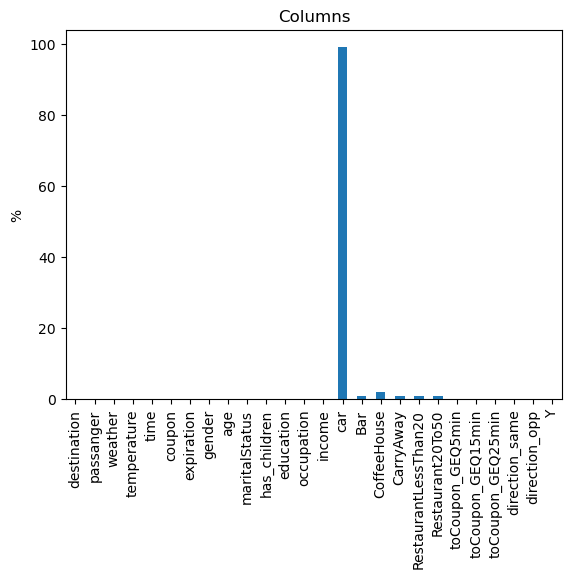

In [10]:

#sns.heatmap(data.isna())
data.isna().mean().round(2).multiply(100).plot(kind="bar")
plt.title('Columns')
plt.ylabel('%')

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
#outliner check
data.describe().round(0)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.0,12684.0,12684.0,12684.0,12684.0,12684.0,12684.0,12684.0
mean,63.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
std,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,55.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
50%,80.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
75%,80.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
max,80.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<Axes: >

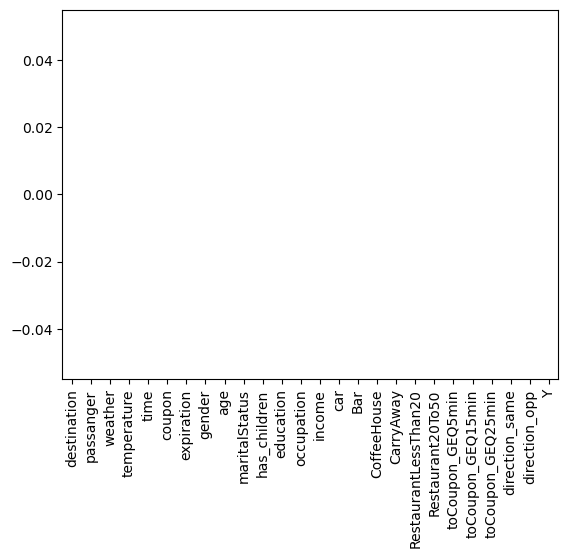

In [13]:
data['car']=data['car'].fillna(1)

data=data.dropna().copy()
data.isna().mean().round(2).multiply(100).plot(kind="bar")
#data.drop_duplicates()
#print(data[data.duplicated()])



4. What proportion of the total observations chose to accept the coupon?



percentage of coupon acceptance % 57


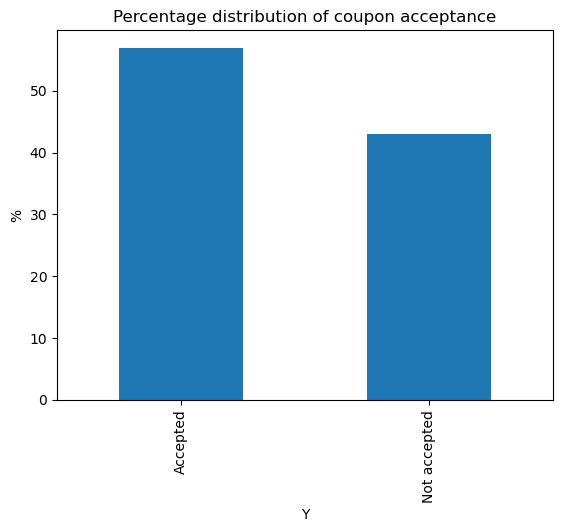

In [15]:


data['Y'].value_counts(normalize=True).multiply(100).plot(kind="bar")
plt.title('Percentage distribution of coupon acceptance')
plt.ylabel('%')
plt.xticks([0,1],['Accepted','Not accepted'])
print(f"percentage of coupon acceptance %",round((data['Y']==1).mean()*100))


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, '%')

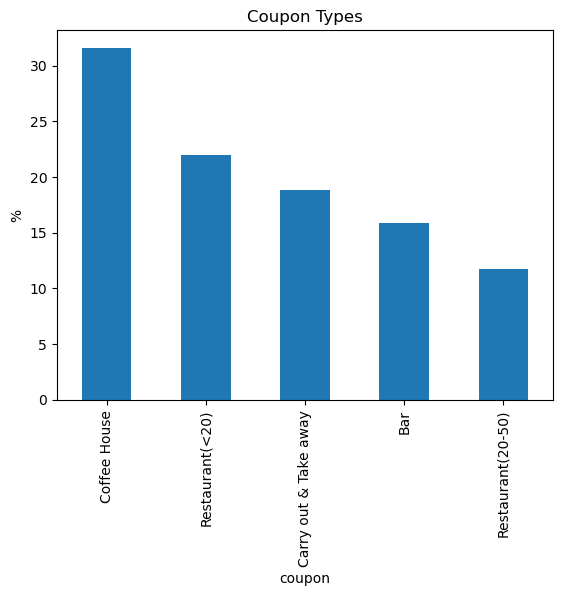

In [17]:
data['coupon'].value_counts(normalize=True).multiply(100).plot(kind="bar")
plt.title('Coupon Types')
plt.ylabel('%')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Occurence')

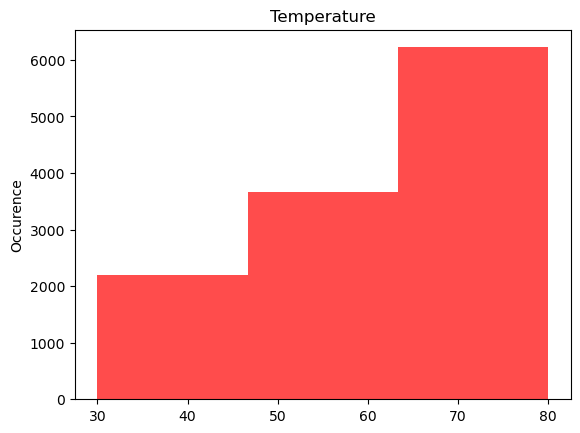

In [19]:
plt.hist(data['temperature'], bins=3, color='red',alpha=0.7)
plt.title('Temperature')
plt.ylabel('Occurence')

In [20]:
data['temperature']

22       55
23       80
24       80
25       80
26       80
         ..
12679    55
12680    55
12681    30
12682    30
12683    80
Name: temperature, Length: 12079, dtype: int64

<Axes: >

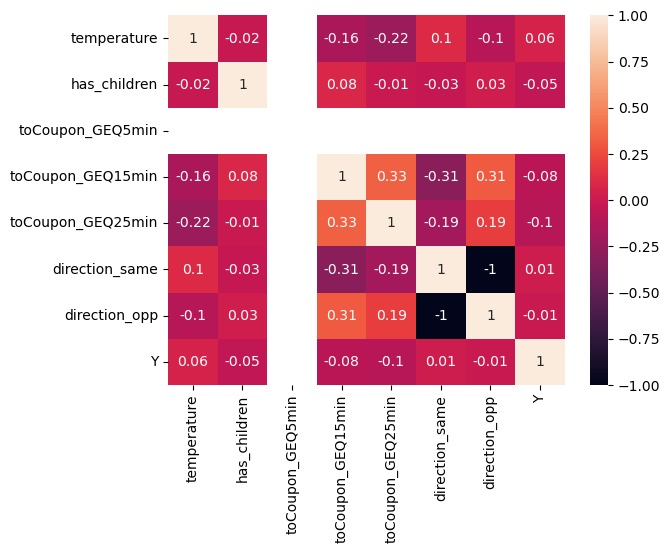

In [21]:
corr=data.corr(numeric_only=True).round(2)
sns.heatmap(corr,annot=True)

In [22]:
cat_col=data.select_dtypes(include="object").columns.tolist()
print(cat_col)

['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


<Figure size 1000x600 with 0 Axes>

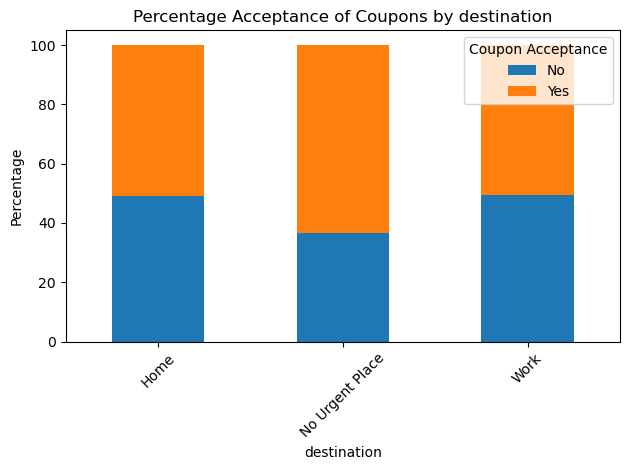

<Figure size 1000x600 with 0 Axes>

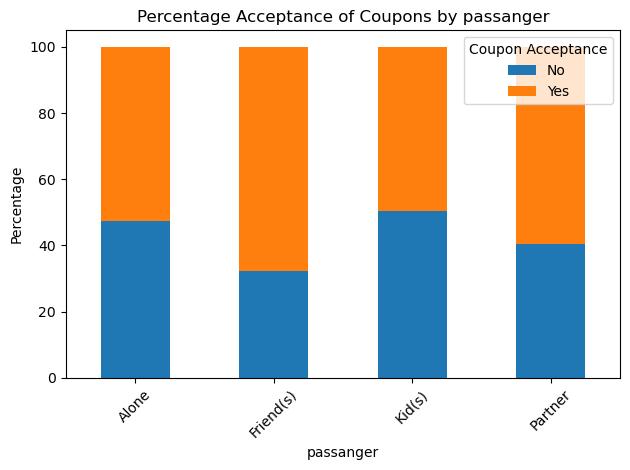

<Figure size 1000x600 with 0 Axes>

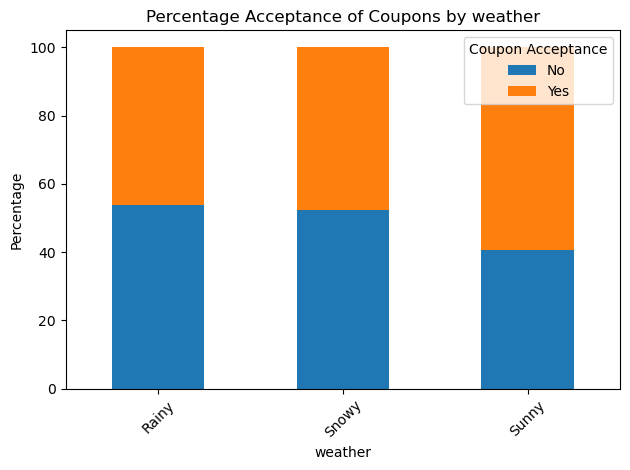

<Figure size 1000x600 with 0 Axes>

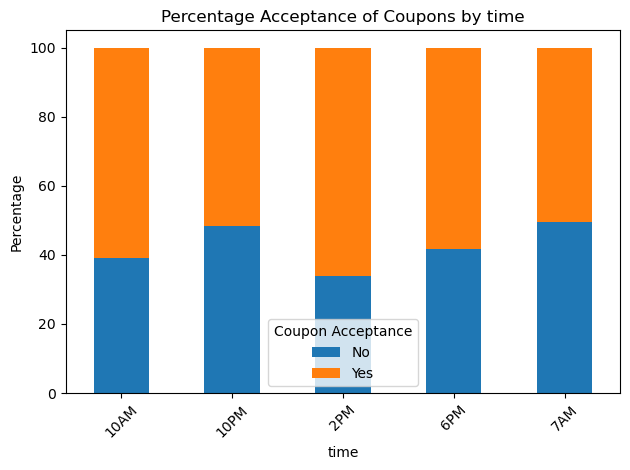

<Figure size 1000x600 with 0 Axes>

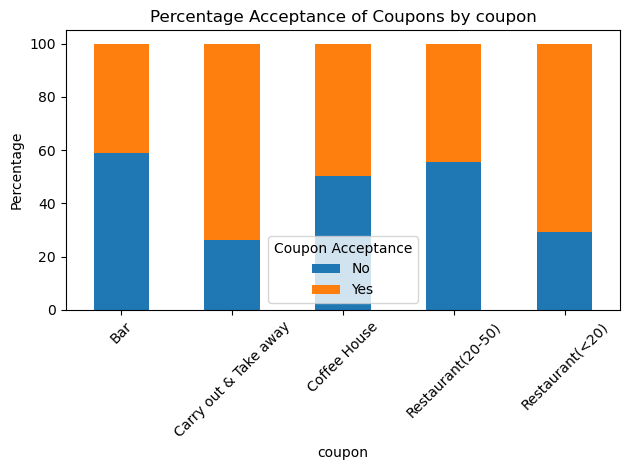

<Figure size 1000x600 with 0 Axes>

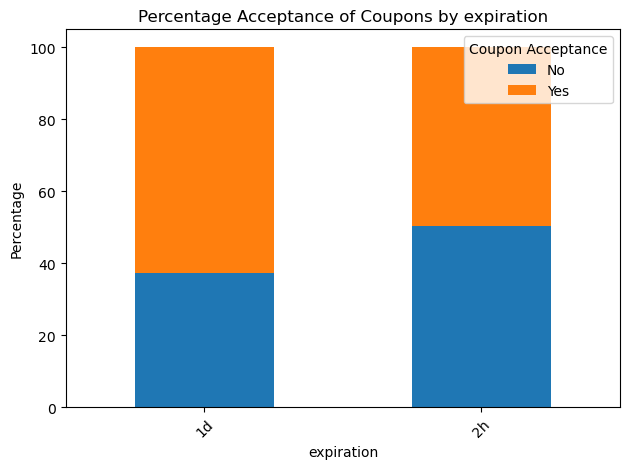

<Figure size 1000x600 with 0 Axes>

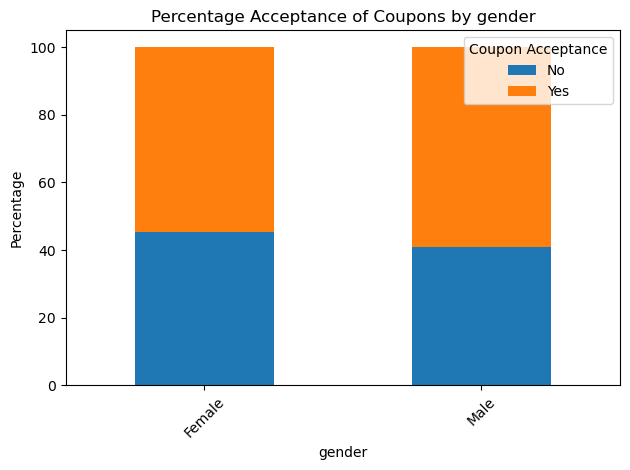

<Figure size 1000x600 with 0 Axes>

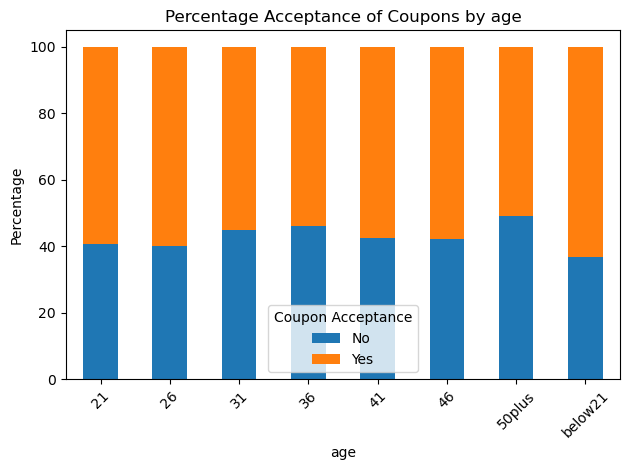

<Figure size 1000x600 with 0 Axes>

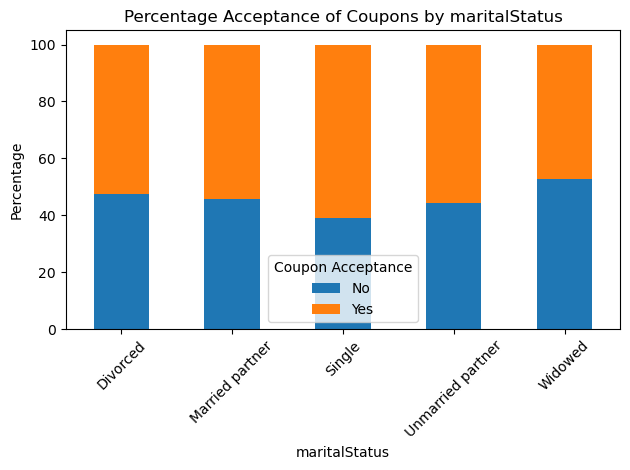

<Figure size 1000x600 with 0 Axes>

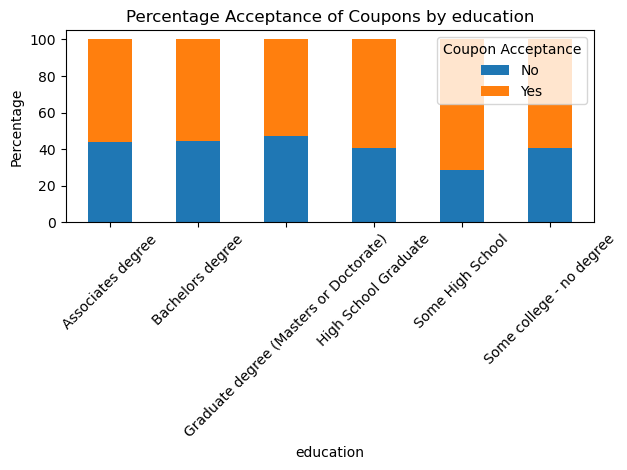

<Figure size 1000x600 with 0 Axes>

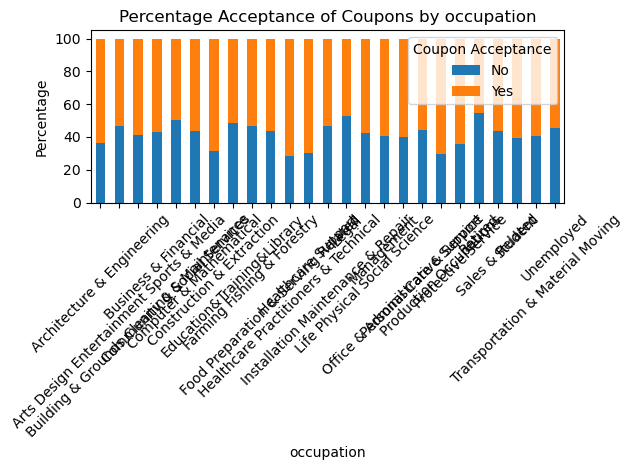

<Figure size 1000x600 with 0 Axes>

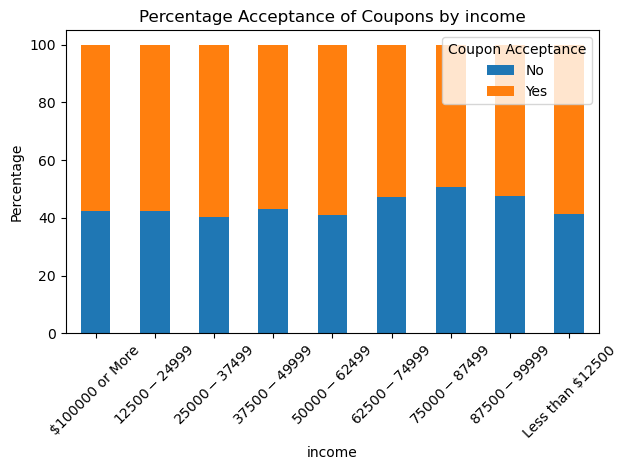

<Figure size 1000x600 with 0 Axes>

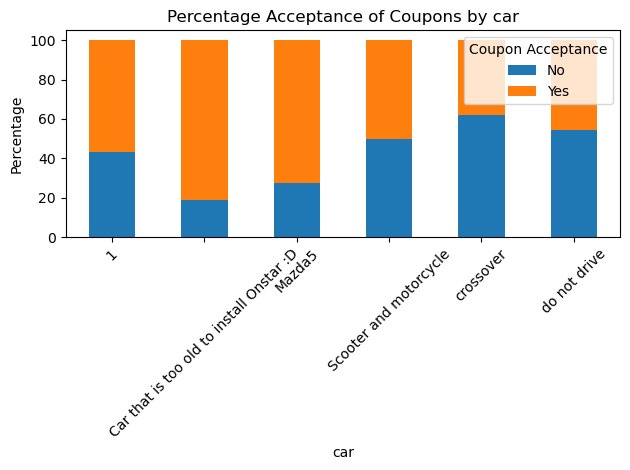

<Figure size 1000x600 with 0 Axes>

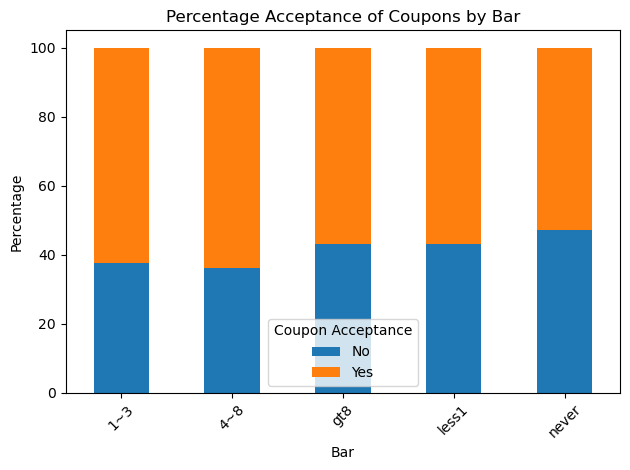

<Figure size 1000x600 with 0 Axes>

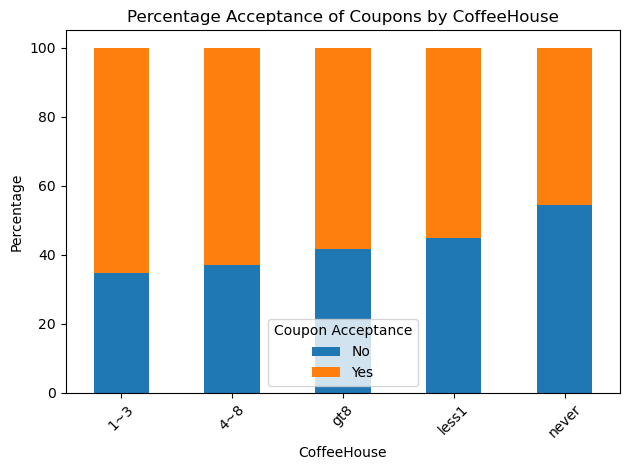

<Figure size 1000x600 with 0 Axes>

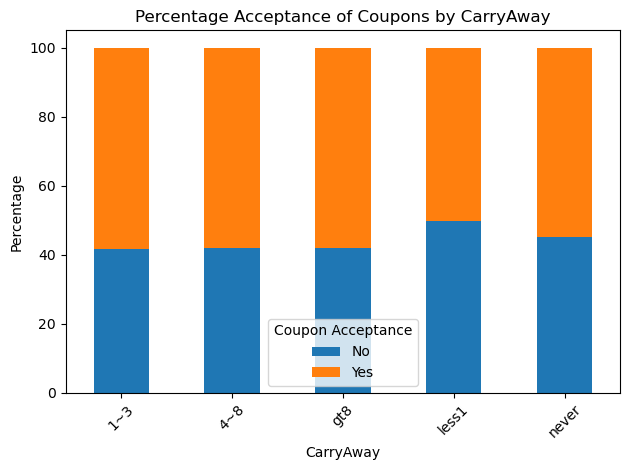

<Figure size 1000x600 with 0 Axes>

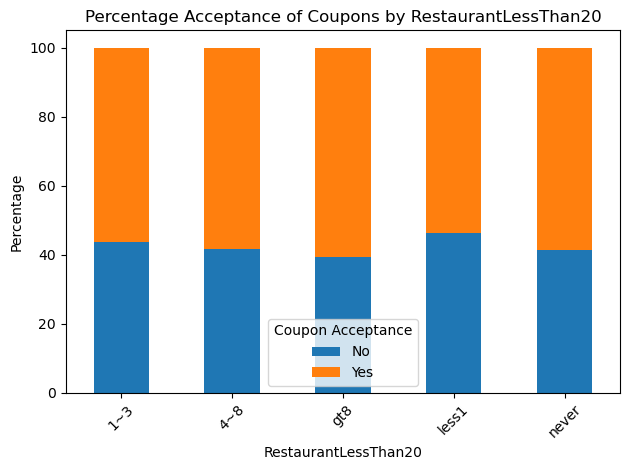

<Figure size 1000x600 with 0 Axes>

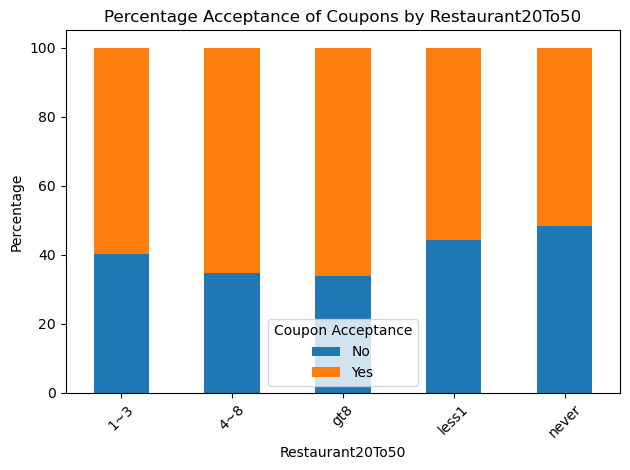

In [23]:
for col in cat_col:
   category_counts = data.groupby([col, 'Y']).size().unstack(fill_value=0)
   category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
   plt.figure(figsize=(10, 6))
   category_percentage.plot(kind='bar', stacked=True)  
   plt.title(f'Percentage Acceptance of Coupons by {col}')
   plt.ylabel('Percentage')
   plt.xlabel(col)
   plt.xticks(rotation=45)
   plt.legend(title='Coupon Acceptance', labels=['No', 'Yes']) 
   plt.tight_layout()
   plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
dataFrame=data[data['coupon']=='Bar']
dataFrame.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [27]:
Acc_Br_cp=dataFrame[dataFrame['Y']==1]
Proportion_accepted_bar=len(Acc_Br_cp)/len(dataFrame)*100
print(f"Accepted bar coupons:: {Proportion_accepted_bar:.2f}%")

Accepted bar coupons:: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


['never' 'less1' '1~3' 'gt8' '4~8']
Acceptance rate for those who go to bars 3 or fewer times a month: 56.26%
Acceptance rate for those who go to bars more than three times a month: 62.13%


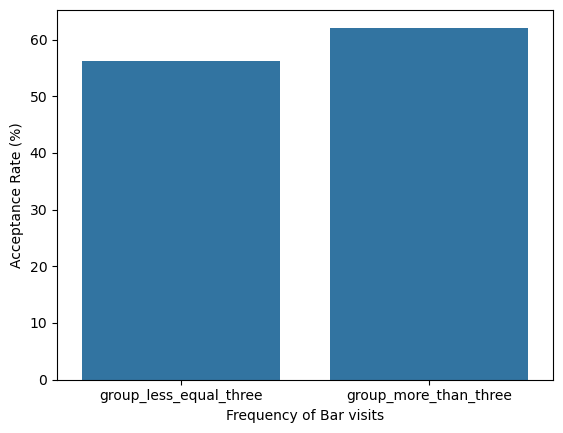

In [29]:
Bar_categories=data['Bar'].unique()
data=data.dropna(subset=['Bar'])
print(Bar_categories)
three_or_fewer = ['never', '1~3','less1']
more_than_three = ['4~8', 'gt8']
group_less_equal_three = data[data['Bar'].isin(three_or_fewer)]
group_more_than_three = data[data['Bar'].isin(more_than_three)]

acceptance_less_equal_three = (group_less_equal_three['Y'] == 1).mean() * 100
acceptance_more_than_three = (group_more_than_three['Y'] == 1).mean() * 100

sns.barplot(x=['group_less_equal_three','group_more_than_three']  , y=[acceptance_less_equal_three,acceptance_more_than_three])
plt.xlabel('Frequency of Bar visits')
plt.ylabel('Acceptance Rate (%)')

print(f"Acceptance rate for those who go to bars 3 or fewer times a month: {acceptance_less_equal_three:.2f}%")
print(f"Acceptance rate for those who go to bars more than three times a month: {acceptance_more_than_three:.2f}%")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [31]:
data['age']=data['age'].replace('50plus',50)
data['age']=data['age'].replace('below21',20)
data['age']=pd.to_numeric(data['age'])
#FILTER IT
group1_condition = ((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & (data['age'] > 25)
group1=data[group1_condition]
group2 = data[~group1_condition] #opposite of selection
group2

acceptance_rate_group1 = group1['Y'].mean() * 100 
acceptance_rate_group2 = group2['Y'].mean() * 100
print(f"Acceptance rate for Group 1 (more than once a month and are over the age of 25): {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for Group 2 (all others): {acceptance_rate_group2:.2f}%")

Acceptance rate for Group 1 (more than once a month and are over the age of 25): 62.30%
Acceptance rate for Group 2 (all others): 55.41%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [33]:
#FILTER IT
group1_condition = ((data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                   (data['passanger'] != 'Kid(s)') &
                   (~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])))
group1 = data[group1_condition]
group2 = data[~group1_condition] # opposite of selection

acceptance_rate_group1 = group1['Y'].mean() * 100 
acceptance_rate_group2 = group2['Y'].mean() * 100
# Print the results
print(f"Acceptance rate for Group 1 (goes to bars more than once a month, passengers not kids, non-farming occupations): {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for Group 2 (all others): {acceptance_rate_group2:.2f}%")

Acceptance rate for Group 1 (goes to bars more than once a month, passengers not kids, non-farming occupations): 62.50%
Acceptance rate for Group 2 (all others): 54.61%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [35]:
re_less20=data['RestaurantLessThan20'].unique()
print(re_less20)
data[data['RestaurantLessThan20'].isna()]
inc=data['income'].unique()
print(inc)

['4~8' '1~3' 'less1' 'gt8' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [36]:
# Condition 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1 = ((data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
             (data['passanger'] != 'Kid(s)') &
             (data['maritalStatus'] != 'Widowed'))
# Condition 2: Drivers who go to bars more than once a month and are under the age of 30
condition2 = (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] < 30)
# Condition 3: Drivers who go to cheap restaurants more than 4 times a month and have income less than 50K
condition3 = (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data['income'].isin(['$12500 - $24999', '$37500 - $49999','$25000 - $37499','Less than $12500']))
# Calculate acceptance rates for each condition
group1 = data[condition1]
group2 = data[condition2]
group3 = data[condition3]
# Assuming 'acceptance' is the column name indicating acceptance (1 for yes, 0 for no)
acceptance_rate_group1 = group1['Y'].mean() * 100
acceptance_rate_group2 = group2['Y'].mean() * 100
acceptance_rate_group3 = group3['Y'].mean() * 100
# Print the results
print(f"Acceptance rate for Group 1 (goes to bars more than once a month, passengers not kids, not widowed): {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for Group 2 (goes to bars more than once a month and under 30): {acceptance_rate_group2:.2f}%")
print(f"Acceptance rate for Group 3 (goes to cheap restaurants more than 4 times a month, income less than 50K): {acceptance_rate_group3:.2f}%")

Acceptance rate for Group 1 (goes to bars more than once a month, passengers not kids, not widowed): 62.50%
Acceptance rate for Group 2 (goes to bars more than once a month and under 30): 62.92%
Acceptance rate for Group 3 (goes to cheap restaurants more than 4 times a month, income less than 50K): 60.25%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [38]:
'''
1. People who go to bars regularly are more likely to use coupons since it fits their lifestyle.
2. Older drivers (over 25) who visit bars frequently seem more interested in bar coupons.
3. Drivers without kids or dependents tend to accept coupons more, possibly because they have more flexibility to go out.
4. Lower-income drivers who eat at cheaper restaurants are more likely to appreciate savings from bar coupons.
5. In general, social habits and fewer family responsibilities seem to increase the chance of using bar coupons.
'''

'\n1. People who go to bars regularly are more likely to use coupons since it fits their lifestyle.\n2. Older drivers (over 25) who visit bars frequently seem more interested in bar coupons.\n3. Drivers without kids or dependents tend to accept coupons more, possibly because they have more flexibility to go out.\n4. Lower-income drivers who eat at cheaper restaurants are more likely to appreciate savings from bar coupons.\n5. In general, social habits and fewer family responsibilities seem to increase the chance of using bar coupons.\n'

In [39]:
'''
!pip install ydata-profiling
from ydata_profiling import ProfileReport
Profile=ProfileReport(data)
Profile.to_file(output_file='output.html')
Profile
'''

"\n!pip install ydata-profiling\nfrom ydata_profiling import ProfileReport\nProfile=ProfileReport(data)\nProfile.to_file(output_file='output.html')\nProfile\n"

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

['less1' '4~8' '1~3' 'gt8' 'never']
Acceptance rate for those who go to CoffeeHouse 3 or fewer times a month: 55.67%
Acceptance rate for those who go to CoffeeHouse more than three times a month: 61.19%


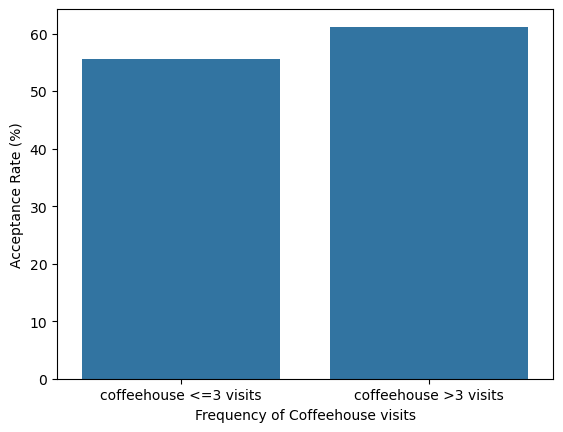

In [85]:
### Compare the acceptance rate between those who went to a coffeehouse  3 or fewer times a month to those who went more.
Cafe_categories=data['CoffeeHouse'].unique()
print(Cafe_categories)
three_or_fewer = ['never', '1~3','less1']
more_than_three = ['4~8', 'gt8']
group_less_equal_three = data[data['CoffeeHouse'].isin(three_or_fewer)]
group_more_than_three = data[data['CoffeeHouse'].isin(more_than_three)]

acceptance_less_equal_three = (group_less_equal_three['Y'] == 1).mean() * 100
acceptance_more_than_three = (group_more_than_three['Y'] == 1).mean() * 100
sns.barplot(x=['coffeehouse <=3 visits','coffeehouse >3 visits']  , y=[acceptance_less_equal_three,acceptance_more_than_three])
plt.xlabel('Frequency of Coffeehouse visits')
plt.ylabel('Acceptance Rate (%)')
print(f"Acceptance rate for those who go to CoffeeHouse 3 or fewer times a month: {acceptance_less_equal_three:.2f}%")
print(f"Acceptance rate for those who go to CoffeeHouse more than three times a month: {acceptance_more_than_three:.2f}%")

In [42]:
### Compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month and are over the age of 25 to the all others. Is there a difference?

#FILTER IT
group1_condition = ((data['CoffeeHouse'] == '1~3') | (data['CoffeeHouse'] == '4~8') | (data['CoffeeHouse'] == 'gt8')) & (data['age'] > 25)
group1=data[group1_condition]
group2 = data[~group1_condition] #opposite of selection
group2
group3_condition = ((data['CoffeeHouse'] == '1~3') | (data['CoffeeHouse'] == '4~8') | (data['CoffeeHouse'] == 'gt8')) & (data['age'] < 25 )
group3=data[group3_condition]
acceptance_rate_group1 = group1['Y'].mean() * 100 
acceptance_rate_group2 = group2['Y'].mean() * 100
acceptance_rate_group3 = group3['Y'].mean() * 100
print(f"Acceptance rate for Group 1 (more than once a month and are over the age of 25): {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate for Group 2 (all others): {acceptance_rate_group2:.2f}%")
print(f"Acceptance rate for Group 3 (more than once a month and are younger than the age of 25): {acceptance_rate_group3:.2f}%")

Acceptance rate for Group 1 (more than once a month and are over the age of 25): 62.54%
Acceptance rate for Group 2 (all others): 53.88%
Acceptance rate for Group 3 (more than once a month and are younger than the age of 25): 65.37%


In [43]:
# Check influence of weather on the coupon acceptance
Cafe_categories=data['weather'].unique()
print(Cafe_categories)


# Condition 1: Sunny wather
condition1 = (data['weather'].isin(['Sunny'])) 
# Condition 2: Snowy weather
condition2 = (data['weather'].isin(['Snowy'])) 
# Condition 3: Rainy weather
condition3 = (data['weather'].isin(['Rainy'])) # Calculate acceptance rates for each condition
group1 = data[condition1]
group2 = data[condition2]
group3 = data[condition3]
# Assuming 'acceptance' is the column name indicating acceptance (1 for yes, 0 for no)
acceptance_rate_group1 = group1['Y'].mean() * 100
acceptance_rate_group2 = group2['Y'].mean() * 100
acceptance_rate_group3 = group3['Y'].mean() * 100
# Print the results
print(f"Acceptance rate of any coupon  (in sunny day): {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate of any coupon(in snowy day): {acceptance_rate_group2:.2f}%")
print(f"Acceptance rate of any coupon (in rainy day): {acceptance_rate_group3:.2f}%")

['Sunny' 'Rainy' 'Snowy']
Acceptance rate of any coupon  (in sunny day): 59.50%
Acceptance rate of any coupon(in snowy day): 47.63%
Acceptance rate of any coupon (in rainy day): 46.21%


Acceptance rate of any coupon  (in sunny day) among those go to CoffeeHouse 4-8 times a month : 67.51%
Acceptance rate of any coupon(in snowy day) among those go to CoffeeHouse 4-8 times a month: 48.36%
Acceptance rate of any coupon (in rainy day) among those go to CoffeeHouse 4-8 times a month: 50.00%


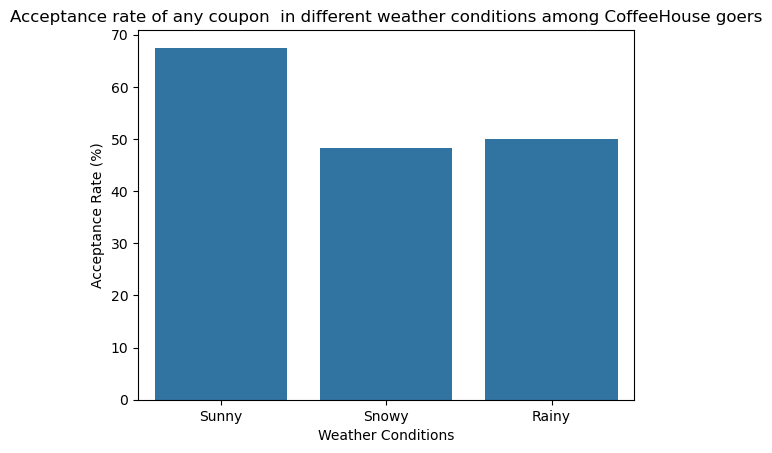

In [44]:
# Check influence of weather on the coupon acceptance of CoffeeHouse coupon in sunny day vs snowyday

# Condition 1: Sunny wather
condition1 = (data['weather'].isin(['Sunny'])) & (data['CoffeeHouse'].isin(['4~8']))
# Condition 2: Snowy weather
condition2 = (data['weather'].isin(['Snowy'])) & (data['CoffeeHouse'].isin(['4~8']))
# Condition 3: Rainy weather
condition3 = (data['weather'].isin(['Rainy'])) & (data['CoffeeHouse'].isin(['4~8']))

# Calculate acceptance rates for each condition
group1 = data[condition1]
group2 = data[condition2]
group3 = data[condition3]
# Assuming 'acceptance' is the column name indicating acceptance (1 for yes, 0 for no)
acceptance_rate_group1 = group1['Y'].mean() * 100
acceptance_rate_group2 = group2['Y'].mean() * 100
acceptance_rate_group3 = group3['Y'].mean() * 100

sns.barplot(x=['Sunny','Snowy','Rainy']  , y=[acceptance_rate_group1,acceptance_rate_group2,acceptance_rate_group3])
plt.title('Acceptance rate of any coupon  in different weather conditions among CoffeeHouse goers')
plt.xlabel('Weather Conditions')
plt.ylabel('Acceptance Rate (%)')
# Print the results
print(f"Acceptance rate of any coupon  (in sunny day) among those go to CoffeeHouse 4-8 times a month : {acceptance_rate_group1:.2f}%")
print(f"Acceptance rate of any coupon(in snowy day) among those go to CoffeeHouse 4-8 times a month: {acceptance_rate_group2:.2f}%")
print(f"Acceptance rate of any coupon (in rainy day) among those go to CoffeeHouse 4-8 times a month: {acceptance_rate_group3:.2f}%")

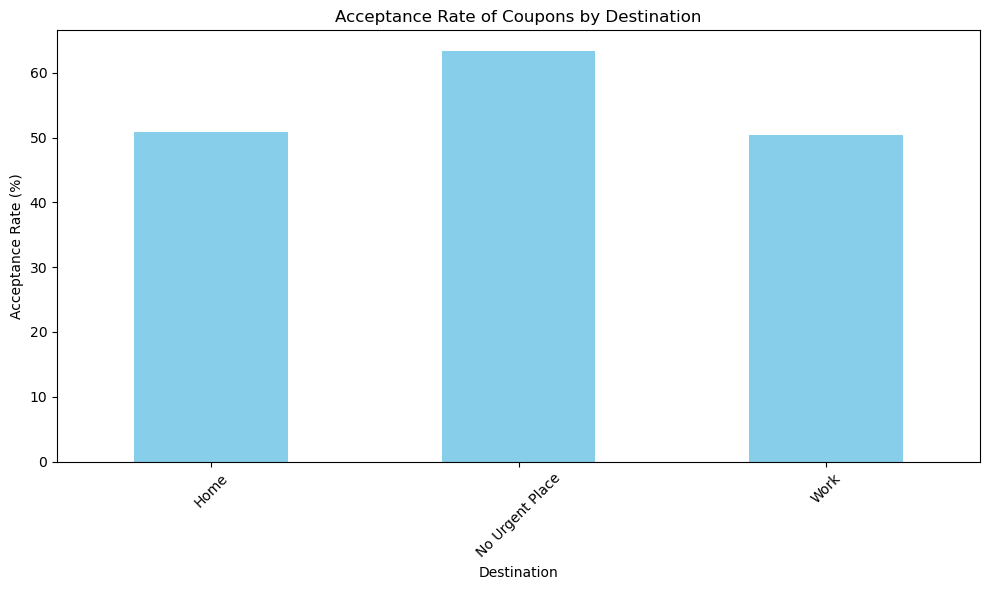

In [45]:
acceptance_rate = data.groupby('destination')['Y'].mean()*100
plt.figure(figsize=(10, 6))
acceptance_rate.plot(kind='bar', color='skyblue')
plt.title('Acceptance Rate of Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

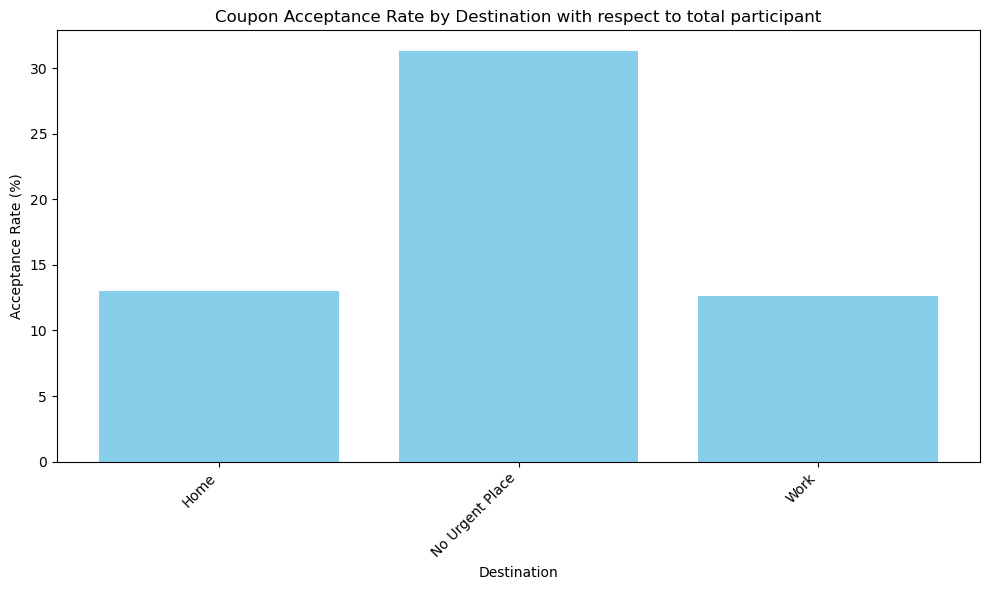

In [46]:
acceptance_rate = data.groupby('destination').agg(coupon_accepted=('Y', 'sum'))
total_paticipants=data['Y'].size
acceptance_rate['acceptance_rate'] = (acceptance_rate['coupon_accepted'] / total_paticipants)*100
plt.figure(figsize=(10,6))
plt.bar(acceptance_rate.index, acceptance_rate['acceptance_rate'], color='skyblue')
plt.title('Coupon Acceptance Rate by Destination with respect to total participant')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

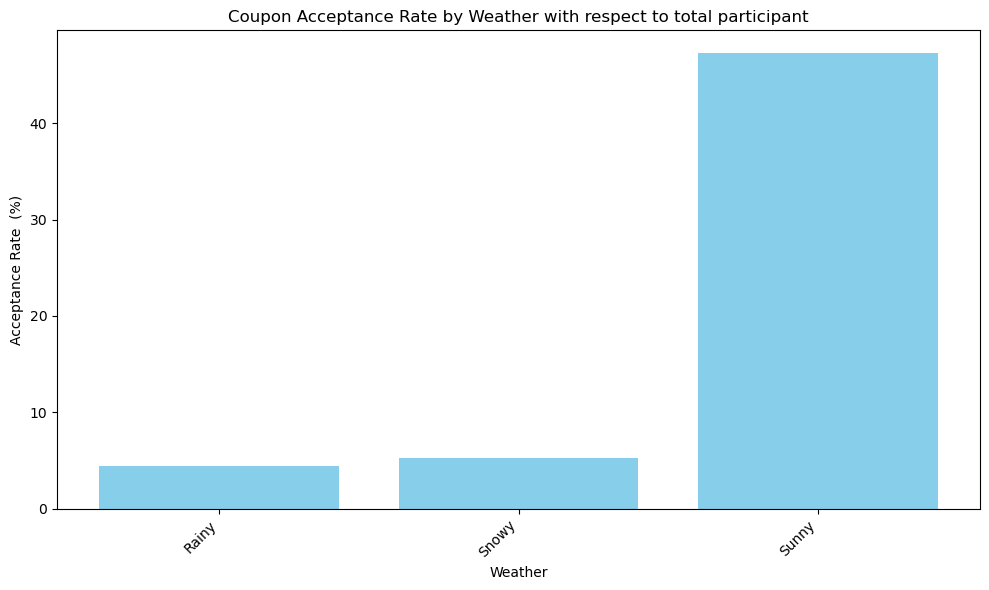

In [47]:
acceptance_rate = data.groupby('weather').agg(coupon_accepted=('Y', 'sum'))
total_paticipants=data['Y'].size
acceptance_rate['acceptance_rate'] = (acceptance_rate['coupon_accepted'] / total_paticipants)*100
plt.figure(figsize=(10,6))
plt.bar(acceptance_rate.index, acceptance_rate['acceptance_rate'], color='skyblue')
plt.title('Coupon Acceptance Rate by Weather with respect to total participant')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate  (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

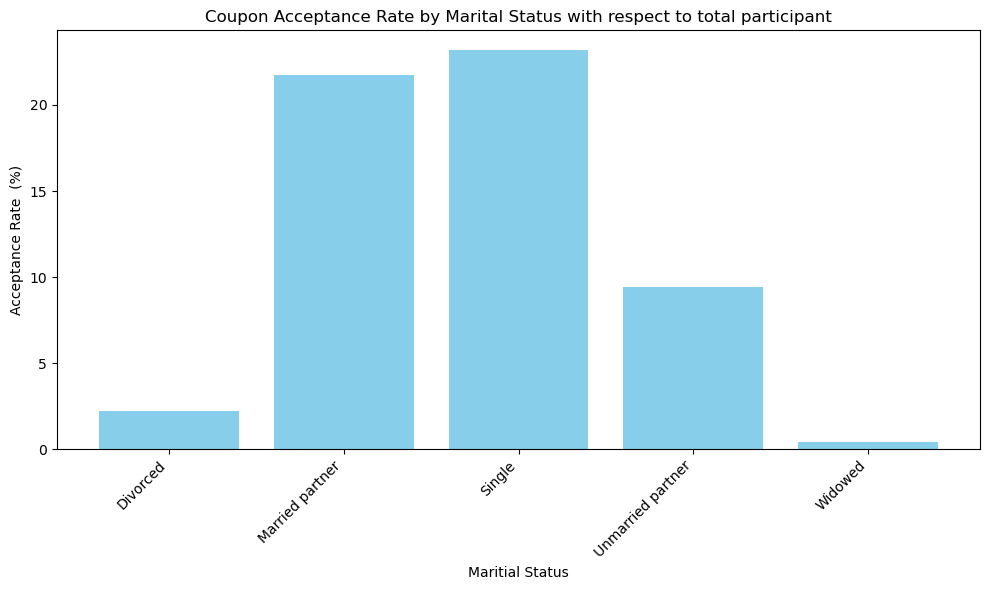

In [48]:
acceptance_rate = data.groupby('maritalStatus').agg(coupon_accepted=('Y', 'sum'))
total_paticipants=data['Y'].size
acceptance_rate['acceptance_rate'] = (acceptance_rate['coupon_accepted'] / total_paticipants)*100
plt.figure(figsize=(10,6))
plt.bar(acceptance_rate.index, acceptance_rate['acceptance_rate'], color='skyblue')
plt.title('Coupon Acceptance Rate by Marital Status with respect to total participant')
plt.xlabel('Maritial Status')
plt.ylabel('Acceptance Rate  (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

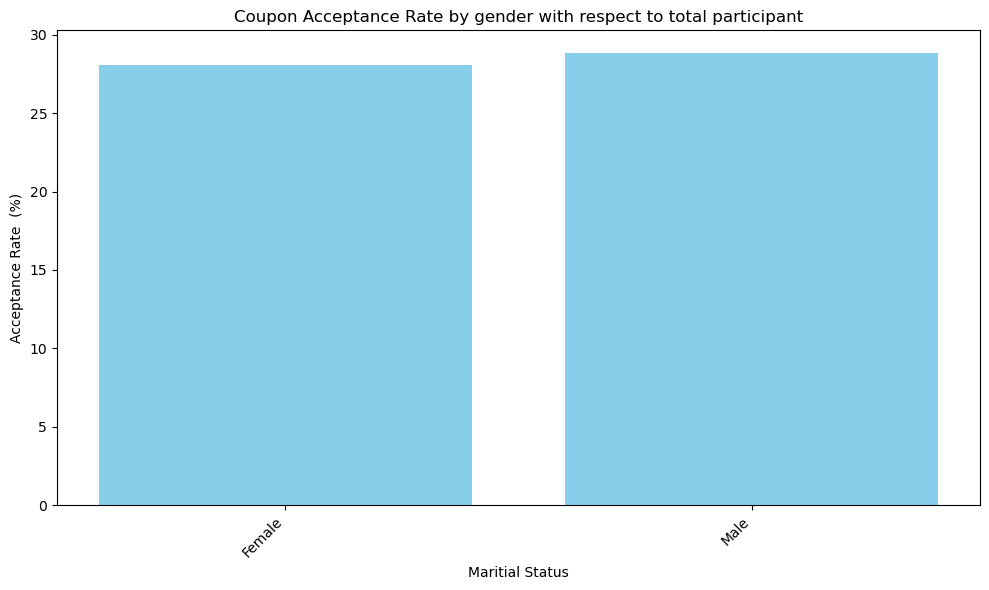

In [49]:
acceptance_rate = data.groupby('gender').agg(coupon_accepted=('Y', 'sum'))
total_paticipants=data['Y'].size
acceptance_rate['acceptance_rate'] = (acceptance_rate['coupon_accepted'] / total_paticipants)*100
plt.figure(figsize=(10,6))
plt.bar(acceptance_rate.index, acceptance_rate['acceptance_rate'], color='skyblue')
plt.title('Coupon Acceptance Rate by gender with respect to total participant')
plt.xlabel('Maritial Status')
plt.ylabel('Acceptance Rate  (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()